In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

In [2]:
data, target = load_diabetes(return_X_y=True, as_frame=True)
data['Target'] = target

**Assign Diabetic or non Diabetic binary values to target variable**

In [3]:
#Target values < thresholdUnit means no Diabetes and >= thresholdUnits means Diabetes
thresholdUnit = 126

isDiabetic = np.array([])

for i in target.values:
    if i > 126:
        isDiabetic = np.append(isDiabetic, True)
    else:
        isDiabetic = np.append(isDiabetic, False)

#Add the new Diabetic non Diabetic in main dataframe        
data['Diabetic'] = isDiabetic

In [4]:
no_of_diabetic = np.count_nonzero(data['Diabetic'].values)
no_of_non_diabetic = len(data['Diabetic'].values)-no_of_diabetic
print("Diabetic: ", no_of_diabetic, "\nNon Diabetic: ", no_of_non_diabetic)
data

Diabetic:  249 
Non Diabetic:  193


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target,Diabetic
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,1.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,1.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,1.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0,0.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0,1.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0,1.0


**Time for appropriate feature selection**

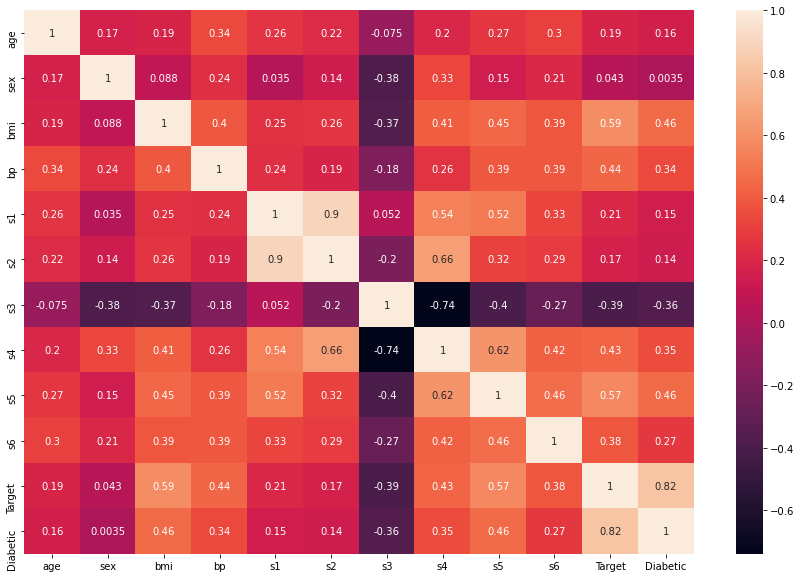

In [5]:
fig, axs = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

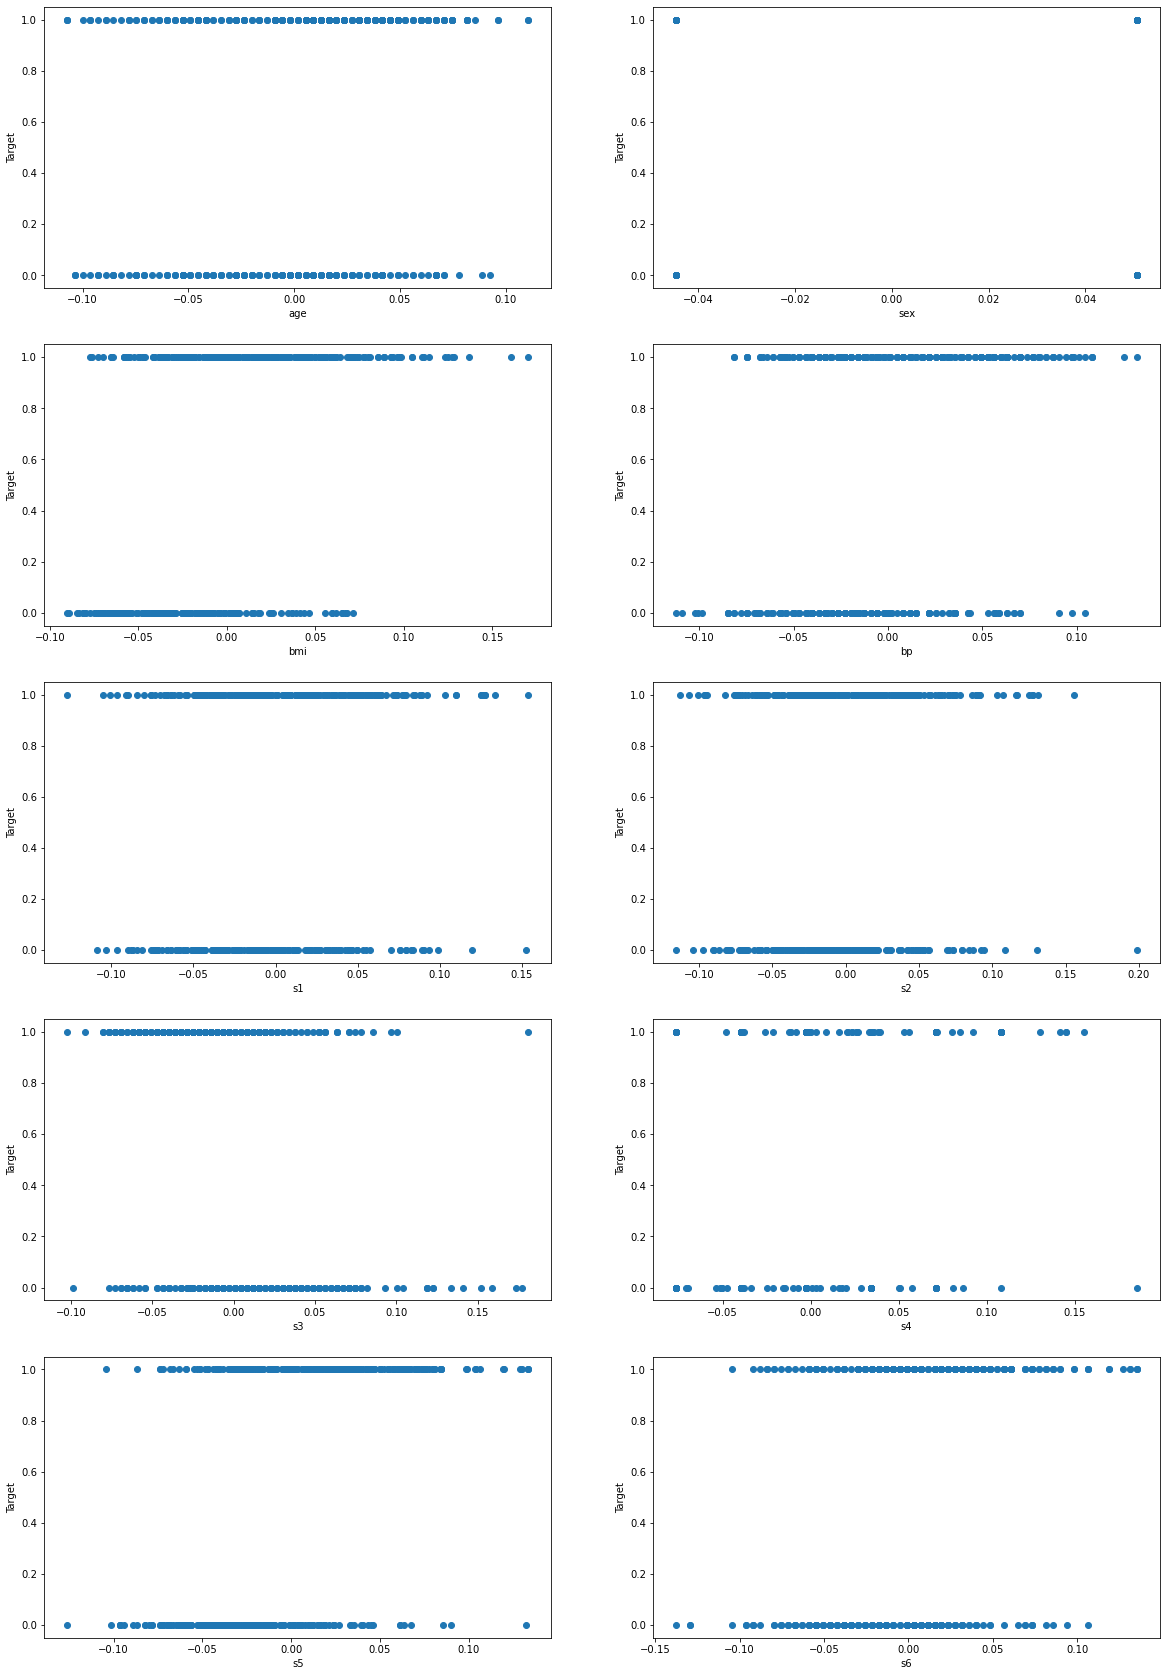

In [6]:
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize=(20,30))
colIndex = 0
for i in range(5):
    for j in range(2):
        axs[i][j].scatter(data[data.columns[colIndex]].values, data["Diabetic"])
        axs[i][j].set_xlabel(data.columns[colIndex])
        axs[i][j].set_ylabel("Target")
        colIndex += 1
plt.show()

In [ ]:
print(data.columns)
#sns.relplot(data = data, x='age', y='age', hue='Diabetic')
#sns.displot(data = data, x='Target', kde=True)
#sns.catplot(kind='violin', data=data, x='s5', y='age', hue='Diabetic')
#sns.jointplot(data = data, x = 'age', y = 'bmi', hue = 'Diabetic')
grid = sns.FacetGrid(data, hue='Diabetic', col=data.columns[i], row=data.columns[i])

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'Target',
       'Diabetic'],
      dtype='object')


**Split Dataframe to training and testing dataframes**

In [49]:
#Split train test dataframe uniformly
diabeticDataFrame = data[data['Diabetic'] == 1]
nonDiabeticDataFrame = data[data["Diabetic"] == 0]
print("Diabetic: ", diabeticDataFrame.shape, "\nNon Diabetic: ", nonDiabeticDataFrame.shape)

Diabetic:  (249, 12) 
Non Diabetic:  (193, 12)
Train:Test data ratio =  2.015625


In [47]:
logReg = LogisticRegression()

x_train = train_test_sample[0]['train'].iloc[:, :-2]
y_train = train_test_sample[0]['train'].iloc[:, -1]

logReg.fit(x_train,y_train)

#For training data
predictedTrainingData = logReg.predict(x_train)

r2_train = r2_score(y_train, predictedTrainingData)
con_mat_train = confusion_matrix(y_train, predictedTrainingData)
print("R2 Score: ", r2_train, "\nConfusion Matrix: \n", pd.DataFrame(data=con_mat_train).rename(columns={0:'True', 1:'False'}, index = {0:'True', 1:'False'}))

R2 Score:  -0.20995670995671012 
Confusion Matrix: 
        True  False
True     85     41
False    37     95


In [48]:
x_test = train_test_sample[0]['test'].iloc[:, :-2]
y_test = train_test_sample[0]['test'].iloc[:, -1]
predicted = logReg.predict(x_test)
r2_test = r2_score(y_test, predicted)
con_mat_test = confusion_matrix(y_test, predicted)
print("R2 Score: ", r2_test, "\nConfusion Matrix: \n", pd.DataFrame(data=con_mat_test).rename(columns={0:'True', 1:'False'}, index = {0:'True', 1:'False'}))

R2 Score:  -0.06483973574749213 
Confusion Matrix: 
        True  False
True     45     22
False    12     49


**Bootstrapping the original data to increase accuracy**

In [140]:
def makeGiantData(no_of_samples = 1, giant = False, replace = False):
    train_test_sample = {}
    for i in range(no_of_samples):
        sampledDiabetic = diabeticDataFrame.sample(n=193, replace=replace).append(nonDiabeticDataFrame)
        sampledDiabetic = sklearn.utils.shuffle(sampledDiabetic).reset_index(drop=True)
        train_test_sample[i]= {
            'test':sampledDiabetic[:193//3*2],
            'train':sampledDiabetic[193//3*2:]
                              }
    if giant:
        testGiant = pd.concat([train_test_sample[i]['test'] for i in range(no_of_samples)])
        trainGiant = pd.concat([train_test_sample[i]['train'] for i in range(no_of_samples)])
        return (testGiant, trainGiant)

#Final randomly generated combined DataFrame
giant_data = makeGiantData(no_of_samples = 100, giant = True, replace=True)

counted = Counter(giant_data[0]['Diabetic'])
print('Diabetic: ',counted[1], '\nNonDiabetic numbers:', counted[0])

Diabetic:  6482 
NonDiabetic numbers: 6318


In [149]:
training_set = giant_data[1].reset_index(drop=True)
testing_set = giant_data[0].reset_index(drop=True)

logModel1 = LogisticRegression()
logModel1.fit(training_set.drop(columns = ['Target', 'Diabetic']), training_set['Diabetic'])
predictedVal1 = logModel1.predict(training_set.drop(columns = ['Target', 'Diabetic']))

conMat1 = confusion_matrix(training_set['Diabetic'], predictedVal1)
r2_score(training_set['Diabetic'], predictedVal1)

0.0762417441829687

Trying to increase accuracy by increasing the data volume by random replacement method but I think this technique is not for such data. Like, although I increase the volume of data, the characteristics of the dataset won't change because the changing the frequency of data/rows is not the way. By this random replacement method, new data with new characteristic features can't be created.